## MISC

In [56]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

## Load datasets for Naive Bayes

In [57]:
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
iris_data.shape

(150, 5)

In [59]:
breast_cancer = load_breast_cancer()
breast_cancer_data = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_data['target'] = breast_cancer.target
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [60]:
breast_cancer_data.shape

(569, 31)

## Naive Bayes Algorithm

In [61]:
def fit_naive_bayes(attributes, target):
    target_probs = {}
    attributes_probs = {}

    # Calculate target probabilities
    unique_target_counts = target.value_counts()    #O(n) time complexity of the value counts function
    total_samples = len(target)
    for target_label, count in unique_target_counts.items():
        target_probs[target_label] = count / total_samples

    # Calculate feature probabilities
    for feature in attributes.columns:
        attributes_probs[feature] = {}
        for target_label in target_probs:
            target_subset = attributes[target == target_label][feature]
            feature_value_counts = target_subset.value_counts()
            total_class_samples = len(target_subset)
            attributes_probs[feature][target_label] = {}
            for value, count in feature_value_counts.items():
                attributes_probs[feature][target_label][value] = count / total_class_samples
    return target_probs, attributes_probs


## C4.5 Algorithm

In [62]:
class Node:
    def __init__(self, isLeaf, label, threshold):
        self.label = label
        self.threshold = threshold
        self.isLeaf = isLeaf
        self.children = []

In [63]:
import math


class C45:
    """Creates a decision tree with C4.5 algorithm"""

    def __init__(self, pathToData, pathToNames):
        self.filePathToData = pathToData
        self.filePathToNames = pathToNames
        self.data = []
        self.classes = []
        self.numAttributes = -1
        self.attrValues = {}
        self.attributes = []
        self.tree = None

    def fetchData(self):
        with open(self.filePathToNames, "r") as file:
            classes = file.readline()
            self.classes = [x.strip() for x in classes.split(",")]
            # add attributes
            for line in file:
                [attribute, values] = [x.strip() for x in line.split(":")]
                values = [x.strip() for x in values.split(",")]
                self.attrValues[attribute] = values
        self.numAttributes = len(self.attrValues.keys())
        self.attributes = list(self.attrValues.keys())
        with open(self.filePathToData, "r") as file:
            for line in file:
                row = [x.strip() for x in line.split(",")]
                if row != [] or row != [""]:
                    self.data.append(row)

    def preprocessData(self):
        for index, row in enumerate(self.data):
            for attr_index in range(self.numAttributes):
                if not self.isAttrDiscrete(self.attributes[attr_index]):
                    self.data[index][attr_index] = float(
                        self.data[index][attr_index])

    def printTree(self):
        self.printNode(self.tree)

    def printNode(self, node, indent=""):
        if not node.isLeaf:
            if node.threshold is None:
                # discrete
                for index, child in enumerate(node.children):
                    if child.isLeaf:
                        print(
                            indent
                            + node.label
                            + " = "
                            + self.attributes[index]
                            + " : "
                            + child.label
                        )
                    else:
                        print(
                            indent + node.label + " = " +
                            self.attributes[index] + " : "
                        )
                        self.printNode(child, indent + "	")
            else:
                # numerical
                leftChild = node.children[0]
                rightChild = node.children[1]
                if leftChild.isLeaf:
                    print(
                        indent
                        + node.label
                        + " <= "
                        + str(node.threshold)
                        + " : "
                        + leftChild.label
                    )
                else:
                    print(indent + node.label + " <= " +
                          str(node.threshold) + " : ")
                    self.printNode(leftChild, indent + "	")

                if rightChild.isLeaf:
                    print(
                        indent
                        + node.label
                        + " > "
                        + str(node.threshold)
                        + " : "
                        + rightChild.label
                    )
                else:
                    print(indent + node.label + " > " +
                          str(node.threshold) + " : ")
                    self.printNode(rightChild, indent + "	")

    def generateTree(self):
        self.tree = self.recursiveGenerateTree(self.data, self.attributes)

    def recursiveGenerateTree(self, curData, curAttributes):
        allSame = self.allSameClass(curData)

        if len(curData) == 0:
            # Fail
            return Node(True, "Fail", None)
        elif allSame is not False:
            # return a node with that class
            return Node(True, allSame, None)
        elif len(curAttributes) == 0:
            # return a node with the majority class
            majClass = self.getMajClass(curData)
            return Node(True, majClass, None)
        else:
            (best, best_threshold, splitted) = self.splitAttribute(
                curData, curAttributes
            )
            remainingAttributes = curAttributes[:]
            remainingAttributes.remove(best)
            node = Node(False, best, best_threshold)
            node.children = [
                self.recursiveGenerateTree(subset, remainingAttributes)
                for subset in splitted
            ]
            return node

    def getMajClass(self, curData):
        freq = [0] * len(self.classes)
        for row in curData:
            index = self.classes.index(row[-1])
            freq[index] += 1
        maxInd = freq.index(max(freq))
        return self.classes[maxInd]

    def allSameClass(self, data):
        for row in data:
            if row[-1] != data[0][-1]:
                return False
        return data[0][-1]

    def isAttrDiscrete(self, attribute):
        if attribute not in self.attributes:
            raise ValueError("Attribute not listed")
        elif (
            len(self.attrValues[attribute]) == 1
            and self.attrValues[attribute][0] == "continuous"
        ):
            return False
        else:
            return True

    def splitAttribute(self, curData, curAttributes):
        splitted = []
        maxEnt = -1 * float("inf")
        best_attribute = -1
        # None for discrete attributes,
        # threshold value for continuous attributes
        best_threshold = None
        for attribute in curAttributes:
            indexOfAttribute = self.attributes.index(attribute)
            if self.isAttrDiscrete(attribute):
                # split curData into n-subsets, where n is the number of
                # different values of attribute i. Choose the attribute with
                # the max gain
                valuesForAttribute = self.attrValues[attribute]
                subsets = [[] for a in valuesForAttribute]
                for row in curData:
                    for index in range(len(valuesForAttribute)):
                        if row[index] == valuesForAttribute[index]:
                            subsets[index].append(row)
                            break
                e = self.gain(curData, subsets)
                if e > maxEnt:
                    maxEnt = e
                    splitted = subsets
                    best_attribute = attribute
                    best_threshold = None
            else:
                # sort the data according to the column.Then try all
                # possible adjacent pairs. Choose the one that
                # yields maximum gain
                curData.sort(key=lambda x: x[indexOfAttribute])
                for j in range(0, len(curData) - 1):
                    if curData[j][indexOfAttribute] != curData[j + 1][indexOfAttribute]:
                        threshold = (
                            curData[j][indexOfAttribute]
                            + curData[j + 1][indexOfAttribute]
                        ) / 2
                        less = []
                        greater = []
                        for row in curData:
                            if row[indexOfAttribute] > threshold:
                                greater.append(row)
                            else:
                                less.append(row)
                        e = self.gain(curData, [less, greater])
                        if e >= maxEnt:
                            splitted = [less, greater]
                            maxEnt = e
                            best_attribute = attribute
                            best_threshold = threshold
        return (best_attribute, best_threshold, splitted)

    def gain(self, unionSet, subsets):
        # input : data and disjoint subsets of it
        # output : information gain
        S = len(unionSet)
        # calculate impurity before split
        impurityBeforeSplit = self.entropy(unionSet)
        # calculate impurity after split
        weights = [len(subset) / S for subset in subsets]
        impurityAfterSplit = 0
        for i in range(len(subsets)):
            impurityAfterSplit += weights[i] * self.entropy(subsets[i])
        # calculate total gain
        totalGain = impurityBeforeSplit - impurityAfterSplit
        return totalGain

    def entropy(self, dataSet):
        S = len(dataSet)
        if S == 0:
            return 0
        num_classes = [0 for i in self.classes]
        for row in dataSet:
            classIndex = list(self.classes).index(row[-1])
            num_classes[classIndex] += 1
        num_classes = [x / S for x in num_classes]
        ent = 0
        for num in num_classes:
            ent += num * self.log(num)
        return ent * -1

    def log(self, x):
        if x == 0:
            return 0
        else:
            return math.log(x, 2)

## Data Mining C4.5

### Iris

In [64]:
iris_c45_50 = C45("./data/iris/iris_50.data", "./data/iris/iris.names")
iris_c45_50.fetchData()
iris_c45_50.preprocessData()

iris_c45_80 = C45("./data/iris/iris_80.data", "./data/iris/iris.names")
iris_c45_80.fetchData()
iris_c45_80.preprocessData()

iris_c45_100 = C45("./data/iris/iris_100.data", "./data/iris/iris.names")
iris_c45_100.fetchData()
iris_c45_100.preprocessData()

iris_c45_120 = C45("./data/iris/iris_120.data", "./data/iris/iris.names")
iris_c45_120.fetchData()
iris_c45_120.preprocessData()

iris_c45_130 = C45("./data/iris/iris_130.data", "./data/iris/iris.names")
iris_c45_130.fetchData()
iris_c45_130.preprocessData()

iris_c45_150 = C45("./data/iris/iris.data", "./data/iris/iris.names")
iris_c45_150.fetchData()
iris_c45_150.preprocessData()

In [65]:
import time

iris_n = [50, 80, 100, 120, 130, 150]
iris_execution_time = []

In [66]:
start_time = time.time()
iris_c45_50.generateTree()
end_time = time.time()

runtime = (end_time - start_time) * 1000
iris_execution_time.append(runtime)

In [67]:
start_time = time.time()
iris_c45_80.generateTree()
end_time = time.time()

runtime = (end_time - start_time) * 1000
iris_execution_time.append(runtime)

In [68]:
start_time = time.time()
iris_c45_100.generateTree()
end_time = time.time()

runtime = (end_time - start_time) * 1000
iris_execution_time.append(runtime)

In [69]:
start_time = time.time()
iris_c45_120.generateTree()
end_time = time.time()

runtime = (end_time - start_time) * 1000
iris_execution_time.append(runtime)

In [70]:
start_time = time.time()
iris_c45_130.generateTree()
end_time = time.time()

runtime = (end_time - start_time) * 1000
iris_execution_time.append(runtime)

In [71]:
start_time = time.time()
iris_c45_150.generateTree()
end_time = time.time()

runtime = (end_time - start_time) * 1000
iris_execution_time.append(runtime)

In [72]:
iris_execution_time

[0.09989738464355469,
 6.708621978759766,
 8.702516555786133,
 22.174835205078125,
 25.88820457458496,
 28.856277465820312]

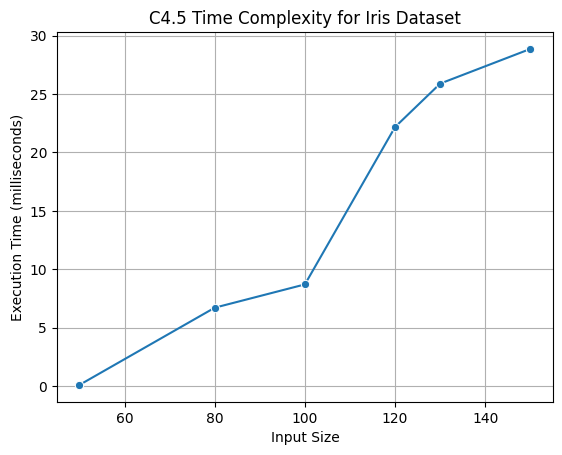

In [73]:
sns.lineplot(x=iris_n, y=iris_execution_time, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (milliseconds)')
plt.title('C4.5 Time Complexity for Iris Dataset')
plt.grid(True)
plt.show()

### Breast Cancer

In [74]:
breast_cancer_n = [100, 200, 300, 400, 500, 569]
breast_cancer_execution_time = []

In [75]:
breast_cancer_c45_100 = C45("./data/breast_cancer/breast_cancer_100.data", "./data/breast_cancer/breast_cancer.names")
breast_cancer_c45_100.fetchData()
breast_cancer_c45_100.preprocessData()

breast_cancer_c45_200 = C45("./data/breast_cancer/breast_cancer_200.data", "./data/breast_cancer/breast_cancer.names")
breast_cancer_c45_200.fetchData()
breast_cancer_c45_200.preprocessData()

breast_cancer_c45_300 = C45("./data/breast_cancer/breast_cancer_300.data", "./data/breast_cancer/breast_cancer.names")
breast_cancer_c45_300.fetchData()
breast_cancer_c45_300.preprocessData()

breast_cancer_c45_400 = C45("./data/breast_cancer/breast_cancer_400.data", "./data/breast_cancer/breast_cancer.names")
breast_cancer_c45_400.fetchData()
breast_cancer_c45_400.preprocessData()

breast_cancer_c45_500 = C45("./data/breast_cancer/breast_cancer_500.data", "./data/breast_cancer/breast_cancer.names")
breast_cancer_c45_500.fetchData()
breast_cancer_c45_500.preprocessData()

breast_cancer_c45_n = C45("./data/breast_cancer/breast_cancer.data", "./data/breast_cancer/breast_cancer.names")
breast_cancer_c45_n.fetchData()
breast_cancer_c45_n.preprocessData()

In [76]:
start_time = time.time()

breast_cancer_c45_100.generateTree()

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000
breast_cancer_execution_time.append(runtime)

In [77]:
start_time = time.time()

breast_cancer_c45_200.generateTree()

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000
breast_cancer_execution_time.append(runtime)

In [78]:
start_time = time.time()

breast_cancer_c45_300.generateTree()

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000
breast_cancer_execution_time.append(runtime)

In [79]:
start_time = time.time()

breast_cancer_c45_400.generateTree()

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000
breast_cancer_execution_time.append(runtime)

In [80]:
start_time = time.time()

breast_cancer_c45_500.generateTree()

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000
breast_cancer_execution_time.append(runtime)

In [81]:
start_time = time.time()

breast_cancer_c45_n.generateTree()

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000
breast_cancer_execution_time.append(runtime)

In [82]:
breast_cancer_execution_time

[426.1586666107178,
 1582.68141746521,
 3139.559030532837,
 5863.903284072876,
 10366.029262542725,
 13952.505588531494]

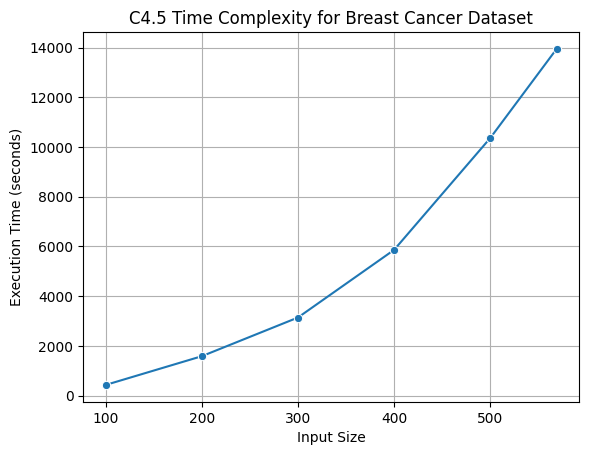

In [83]:
sns.lineplot(x=breast_cancer_n, y=breast_cancer_execution_time, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('C4.5 Time Complexity for Breast Cancer Dataset')
plt.grid(True)
plt.show()

## Data Mining Naive Bayes

### Iris

In [84]:
# Separate features and target variable
iris_attributes = iris_data.drop(columns=['target'])
iris_target = iris_data['target']

In [85]:
# Selecting rows
first_50_iris_attributes = iris_attributes.iloc[:50]
first_50_iris_target = iris_target.iloc[:50]


first_80_iris_attributes = iris_attributes.iloc[:80]
first_80_iris_target = iris_target.iloc[:80]


first_100_iris_attributes = iris_attributes.iloc[:100]
first_100_iris_target = iris_target.iloc[:100]



first_120_iris_attributes = iris_attributes.iloc[:120]
first_120_iris_target = iris_target.iloc[:120]


first_130_iris_attributes = iris_attributes.iloc[:130]
first_130_iris_target = iris_target.iloc[:130]


first_150_iris_attributes = iris_attributes

In [86]:
x_iris = [50,80,100,120,130,150]
y_iris=[]

In [87]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_50_iris_attributes, first_50_iris_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000

y_iris.append(runtime)

In [88]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_80_iris_attributes, first_80_iris_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000

y_iris.append(runtime)

In [89]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_100_iris_attributes, first_100_iris_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000

y_iris.append(runtime)

In [90]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_120_iris_attributes, first_120_iris_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000

y_iris.append(runtime)

In [91]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_130_iris_attributes, first_130_iris_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000

y_iris.append(runtime)

In [92]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_150_iris_attributes, iris_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time) * 1000

y_iris.append(runtime)

In [93]:
y_iris

[5.969762802124023,
 11.627912521362305,
 12.46023178100586,
 14.26839828491211,
 14.687299728393555,
 12.426376342773438]

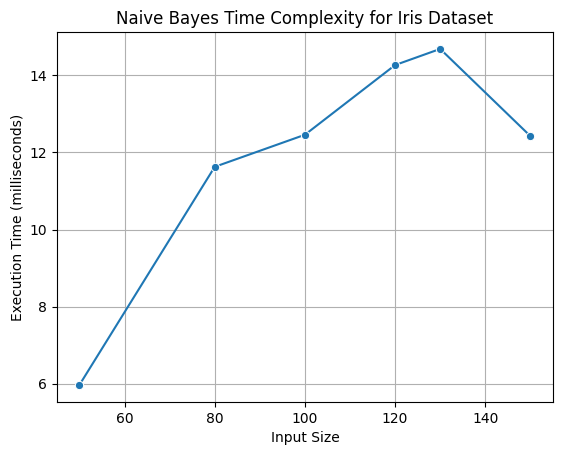

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=x_iris, y=y_iris, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Naive Bayes Time Complexity for Iris Dataset')
plt.grid(True)
plt.show()

### Breast Cancer

In [95]:
x_breastCancer = [100,200,300,400,500,569]
y_breastCancer=[]

In [96]:
# Separate features and target variable
breastCancer_attributes = breast_cancer_data.drop(columns=['target'])
breastCancer_target = breast_cancer_data['target']

In [97]:
# Selecting rows
first_100_breastCancer_attributes = iris_attributes.iloc[:100]
first_100_breastCancer_target = breastCancer_target.iloc[:100]


first_200_breastCancer_attributes = iris_attributes.iloc[:200]
first_200_breastCancer_target = breastCancer_target.iloc[:200]


first_300_breastCancer_attributes = iris_attributes.iloc[:300]
first_300_breastCancer_target = breastCancer_target.iloc[:300]


first_400_breastCancer_attributes = iris_attributes.iloc[:400]
first_400_breastCancer_target = breastCancer_target.iloc[:400]


first_500_breastCancer_attributes = iris_attributes.iloc[:500]
first_500_breastCancer_target = breastCancer_target.iloc[:500]


first_breastCancer_attributes = iris_attributes
first_breastCancer_target = breastCancer_target

In [98]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_100_breastCancer_attributes, first_100_breastCancer_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time)*1000
y_breastCancer.append(runtime)

In [99]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_200_breastCancer_attributes, first_200_breastCancer_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time)*1000

y_breastCancer.append(runtime)

/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame i

In [100]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_300_breastCancer_attributes, first_300_breastCancer_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time)*1000

y_breastCancer.append(runtime)

/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame i

In [101]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_400_breastCancer_attributes, first_400_breastCancer_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time)*1000

y_breastCancer.append(runtime)

/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame i

In [102]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_500_breastCancer_attributes, first_500_breastCancer_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time)*1000

y_breastCancer.append(runtime)

/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame i

In [103]:
start_time = time.time()

# Train Naive Bayes classifier
fit_naive_bayes(first_breastCancer_attributes, first_breastCancer_target)

end_time = time.time()

# Calculate the runtime
runtime = (end_time - start_time)*1000

y_breastCancer.append(runtime)

/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_subset = attributes[target == target_label][feature]
/tmp/ipykernel_696549/2171478947.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame i

In [104]:
y_breastCancer

[8.179664611816406,
 13.913393020629883,
 15.156269073486328,
 16.529321670532227,
 16.444921493530273,
 16.101598739624023]

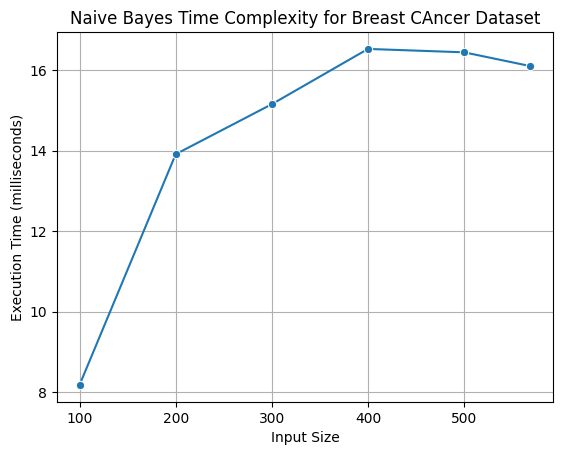

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=x_breastCancer, y=y_breastCancer, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Naive Bayes Time Complexity for Breast CAncer Dataset')
plt.grid(True)
plt.show()

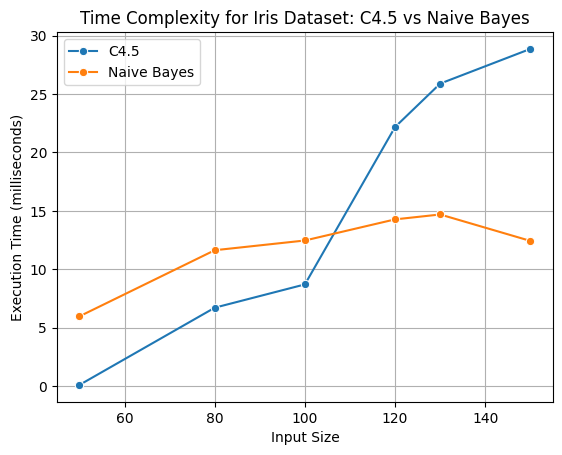

In [106]:
# Plot for C4.5 Algorithm
sns.lineplot(x=iris_n, y=iris_execution_time, marker='o', label='C4.5')

# Plot for Naive Bayes Algorithm
sns.lineplot(x=x_iris, y=y_iris, marker='o', label='Naive Bayes')

plt.xlabel('Input Size')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Time Complexity for Iris Dataset: C4.5 vs Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


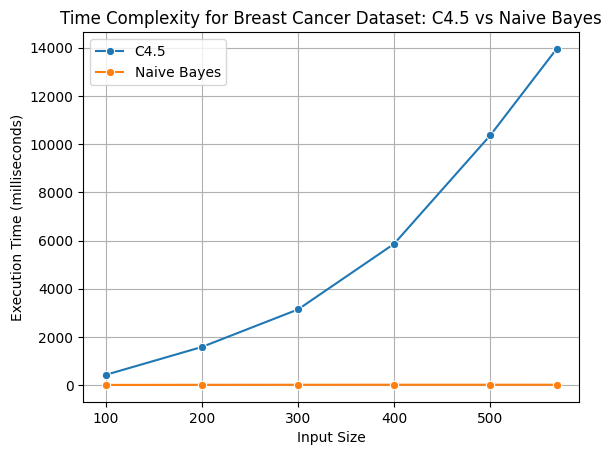

In [107]:
# Plot for C4.5 Algorithm
sns.lineplot(x=breast_cancer_n, y=breast_cancer_execution_time, marker='o', label='C4.5')

# Plot for Naive Bayes Algorithm
sns.lineplot(x=x_breastCancer, y=y_breastCancer, marker='o', label='Naive Bayes')

plt.xlabel('Input Size')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Time Complexity for Breast Cancer Dataset: C4.5 vs Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()
